**© Jesús López 2022**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Linear Regression: A Supervised Regression Model

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [183]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
...,...,...
WI,4.554,13.8
WY,5.568,17.4


## How do we compute a Linear Regression Model in Python?

- As always, we need to use a function

Where is the function?

- It should be in a library

Which is the Python library for Machine Learning?

- Sci-Kit Learn, see [website](https://scikit-learn.org/stable/)

### Import the Class

How can we access the function to compute a Linear Regression model?

- We need to import the `LinearRegression` class within `linear_model` module:

In [184]:
from sklearn.linear_model import LinearRegression

### Instantiante the Class

- Now we create an instance `model_lr` of the class `LinearRegression`:

In [185]:
model_lr = LinearRegression()

### Fit the Model

Which is the funtion that applies the Linear Regression **algorithm** in which the **Residual Sum of Squares is minimised**?

In [186]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

Why is it asking for two parameters: `y` and `X`?

The algorithm needs to distinguish between the variable we would like to predict (`y`) and the variables used to explain (`X`) the prediction.

- `y`: target ~ independent ~ label ~ class variable
- `X`: features ~ dependent ~ explanatory variables

### Separate the Variables

In [187]:
target = df_crashes['accidents']
features = df_crashes[['alcohol']]

### Fit the Model Again

In [188]:
model_lr.fit(X=features, y=target)

LinearRegression()

### Predictions

#### Calculate the Predictions

Take the historical data:

In [189]:
features

,alcohol
abbrev,
AL,5.640
AK,4.525
...,...
WI,4.554
WY,5.568


To calculate predictions through the Model's Mathematical Equation:

In [190]:
model_lr.predict(X=features)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

#### Add a New Column with the Predictions

Can you see the difference between the reality and the prediction?

- Model predictions aren't perfect; they don't exactly predict the real data. Nevertheless, they make a fair approximation that allows decision makers have a better understanding of the future.

In [191]:
df_crashes['pred_lr'] = model_lr.predict(X=features)
df_crashes

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
...,...,...,...
WI,4.554,13.8,15.113810
WY,5.568,17.4,17.174771


### Model Visualization

The orange dots reference the predictions, which are lined up in a line because the Linear Regression model calculates the best coefficients (numbers) for a line's mathematical equation based on historical data.

In [193]:
import matplotlib.pyplot as plt

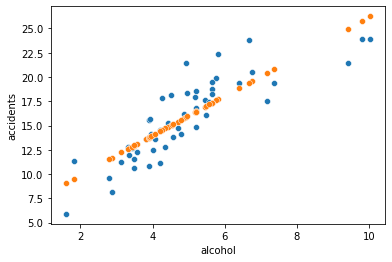

In [195]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);

We have got orange dots for the alcohol represented in our `DataFrame`. Were we to make estimations about all possible alcohol numbers, we'd get a **sequence of consecutive points** which represented a line. Let's draw it with `.lineplot()` function:

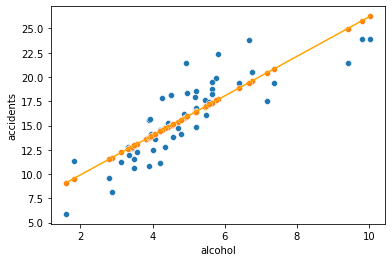

In [149]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);
sns.lineplot(x='alcohol', y='pred_lr', data=df_crashes, color='orange');

### Model's Score

#### Calculate the Score

In order to measure the quality of the model, we use the `.score()` function to propperly calculate the difference between the model's predictions and reality.

In [197]:
model_lr.score(X=features, y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

The step-by-step procedure of the previous calculation starts with the difference between reality and predictions:

In [198]:
df_crashes['accidents'] - df_crashes['pred_lr']

abbrev
AL    1.478888
AK    3.045133
        ...   
WI   -1.313810
WY    0.225229
Length: 51, dtype: float64

This difference is usually called **residuals**:

In [199]:
df_crashes['residuals'] = df_crashes['accidents'] - df_crashes['pred_lr']
df_crashes

,alcohol,accidents,pred_lr,residuals
abbrev,,,,
AL,5.640,18.8,17.321112,1.478888
AK,4.525,18.1,15.054867,3.045133
...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810
WY,5.568,17.4,17.174771,0.225229


We cannot use all the residuals to tell how good our model is. Therefore, we need to add them up:

In [200]:
df_crashes.residuals.sum()

1.4033219031261979e-13

Let's round to two decimal points to supress the scientific notation:

In [201]:
df_crashes.residuals.sum().round(2)

0.0

But we get ZERO. Why?

The residuals contain positive and negative numbers; some points are above the line, other points are below the line.

In order to turn negative values into positive values, we square the residuals:

In [202]:
df_crashes['residuals^2'] = df_crashes.residuals**2
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals^2
abbrev,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111
AK,4.525,18.1,15.054867,3.045133,9.272834
...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096
WY,5.568,17.4,17.174771,0.225229,0.050728


And finally add the residuals up to calculate the **Residual Sum of Squares (RSS)**:

In [203]:
df_crashes['residuals^2'].sum()

231.96888653310063

In [204]:
RSS = df_crashes['residuals^2'].sum()

$$
RSS = \sum(y_i - \hat{y})^2
$$

where
- y_i is the real number of accidents
- $\hat y$ is the predicted number of accidents
- RSS: Residual Sum of Squares

##### Target's Variation

The model was made to predict the number of accidents.

We should ask: how good are the variation of the model's predictions compared to the variation of the real data (real number of accidents)?

We have already calculated the variation of the model's prediction. Now we calculate the variation of the real data by comparing each accident value to the average:

In [205]:
df_crashes.accidents

abbrev
AL    18.8
AK    18.1
      ... 
WI    13.8
WY    17.4
Name: accidents, Length: 51, dtype: float64

In [206]:
df_crashes.accidents.mean()

15.79019607843137

$$
x_i - \bar x
$$

where x is the number of accidents

In [207]:
df_crashes.accidents - df_crashes.accidents.mean()

abbrev
AL    3.009804
AK    2.309804
        ...   
WI   -1.990196
WY    1.609804
Name: accidents, Length: 51, dtype: float64

In [208]:
df_crashes['real_residuals'] = df_crashes.accidents - df_crashes.accidents.mean()
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals^2,real_residuals
abbrev,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,3.009804
AK,4.525,18.1,15.054867,3.045133,9.272834,2.309804
...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,-1.990196
WY,5.568,17.4,17.174771,0.225229,0.050728,1.609804


We square the residuals due to the same reason as before (convert negative values into positive ones):

In [162]:
df_crashes['real_residuals^2'] = df_crashes.real_residuals**2

$$
TTS = \sum(y_i - \bar y)^2
$$

where
- y_i is the number of accidents
- $\bar y$ is the average number of accidents
- TTS: Total Sum of Squares

And we add up the values to get the **Total Sum of Squares (RSS)**:

In [163]:
df_crashes['real_residuals^2'].sum()

849.5450980392156

In [164]:
TSS = df_crashes['real_residuals^2'].sum()

##### The Ratio

The ratio between RSS and TSS represents how much our model fails with respect to the variation of the real data.

In [165]:
RSS/TSS

0.2730507033334595

0.27 is the badness of the model as **RSS** represents the **residuals** (errors) of the model.

To calculate the **goodness** of the model, we need to substract the ratio RSS/TSS to 1:

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum(y_i - \hat{y})^2}{\sum(y_i - \bar y)^2}
$$

In [166]:
1 - RSS/TSS

0.7269492966665405

The model is able to explain 72.69% of the total number of accidents variability.

The following image describes how we calculate the goodness of the model.

![](https://media-exp1.licdn.com/dms/image/C5112AQHeNIN7uPgAcA/article-inline_image-shrink_1500_2232-alternative/0/1560061784390?e=1664409600&v=beta&t=wkxQ3gKrF3-NmTR9_Ro0m_-V4JLxUzCMuSfqhG8cql4)

### Model Interpretation

How do we get the numbers of the mathematical equation of the Linear Regression?

- We need to look inside the object `model_lr` and show the attributes with `.__dict__` (the numbers were computed with the `.fit()` function):

In [167]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.9688865331006,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.857776154826299}

- `intercept_` is the (a) number of the mathematical equation
- `coef_` is the (b) number of the mathematical equation

$$
accidents = (a) + (b) \cdot alcohol \\
accidents = (intercept\_) + (coef\_) \cdot alcohol \\
accidents = (5.857) + (2.032) \cdot alcohol
$$

For every unit of alcohol increased, the number of accidents will increase 2.032 units.

In [168]:
import pandas as pd

df_to_pred = pd.DataFrame({'alcohol': [1,2,3,4,5]})
df_to_pred['pred_lr'] = 5.857 + 2.032 * df_to_pred.alcohol
df_to_pred['diff'] = df_to_pred.pred_lr.diff()
df_to_pred

,alcohol,pred_lr,diff
0,1,7.889,NaN
1,2,9.921,2.032
2,3,11.953,2.032
3,4,13.985,2.032
4,5,16.017,2.032


## Other Regression Models

Could we make a better model that improves the current Linear Regression's Score?

In [210]:
model_lr.score(X=features, y=target)

0.7269492966665405

- Let's try a Random Forest and a Support Vector Machines.

Do we need to know the maths behind these models to implement them in Python?

- No. As we explain in [this tutorial](https://blog.resolvingpython.com/why-all-machine-learning-models-are-the-same), all you need to do is:

    1. `fit()`
    2. `.predict()`
    3. `.score()`
    4. Repeat

### `RandomForestRegressor()` in Python

#### Fit the Model

In [211]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X=features, y=target)

RandomForestRegressor()

#### Calculate Predictions

In [212]:
model_rf.predict(X=features)

array([18.644     , 16.831     , 17.54634286, 21.512     , 12.182     ,
       13.15      , 12.391     , 17.439     ,  7.775     , 17.74664286,
       14.407     , 18.365     , 15.101     , 14.132     , 13.553     ,
       15.097     , 15.949     , 19.857     , 21.114     , 15.53      ,
       13.241     ,  8.98      , 14.363     ,  9.54      , 17.208     ,
       16.593     , 22.087     , 16.24144286, 14.478     , 11.51      ,
       11.59      , 18.537     , 11.77      , 17.54634286, 23.487     ,
       14.907     , 20.462     , 12.59      , 18.38      , 12.449     ,
       23.487     , 20.311     , 19.004     , 19.22      ,  9.719     ,
       13.476     , 12.333     , 11.08      , 22.368     , 14.67      ,
       17.966     ])

In [213]:
df_crashes['pred_rf'] = model_rf.predict(X=features)

#### Model's Score

In [214]:
model_rf.score(X=features, y=target)

0.9549469198566546

Let's create a dictionary that stores the Score of each model:

In [215]:
dic_scores = {}
dic_scores['lr'] = model_lr.score(X=features, y=target)
dic_scores['rf'] = model_rf.score(X=features, y=target)

### `SVR()` in Python

#### Fit the Model

In [216]:
from sklearn.svm import SVR

model_sv = SVR()
model_sv.fit(X=features, y=target)

SVR()

#### Calculate Predictions

In [217]:
model_sv.predict(X=features)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [218]:
df_crashes['pred_sv'] = model_sv.predict(X=features)

#### Model's Score

In [219]:
model_sv.score(X=features, y=target)

0.7083438012012769

In [220]:
dic_scores['sv'] = model_sv.score(X=features, y=target)

## Which One Is the Best? Why?

The best model is the Random Forest with an Score of 0.95:

In [221]:
pd.Series(dic_scores).sort_values(ascending=False)

rf    0.954947
lr    0.726949
sv    0.708344
dtype: float64

## Visualize the 3 Models

Let's put the following data:

In [222]:
df_crashes[['accidents', 'pred_lr', 'pred_rf', 'pred_sv']]

,accidents,pred_lr,pred_rf,pred_sv
abbrev,,,,
AL,18.8,17.321112,18.644,18.295708
AK,18.1,15.054867,16.831,15.184627
...,...,...,...,...
WI,13.8,15.113810,14.670,15.273977
WY,17.4,17.174771,17.966,18.135725


Into a plot:

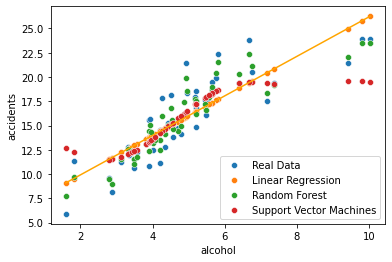

In [224]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes, label='Real Data')
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes, label='Linear Regression')
sns.lineplot(x='alcohol', y='pred_lr', data=df_crashes, color='orange')
sns.scatterplot(x='alcohol', y='pred_rf', data=df_crashes, label='Random Forest')
sns.scatterplot(x='alcohol', y='pred_sv', data=df_crashes, label='Support Vector Machines');

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.